In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime as dt
import itertools

In [2]:
dfs = pd.read_excel("data/data_score.xlsx")

In [3]:
for col in dfs.columns:
    print(col)

Unnamed: 0
Wk
Day
Date
Time
Home
Score
Away
Attendance
Venue
Referee
Match Report
Notes
xG
xG.1


In [4]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13190 entries, 0 to 13189
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    13190 non-null  int64  
 1   Wk            11646 non-null  float64
 2   Day           11646 non-null  object 
 3   Date          11646 non-null  object 
 4   Time          3040 non-null   object 
 5   Home          11646 non-null  object 
 6   Score         11646 non-null  object 
 7   Away          11646 non-null  object 
 8   Attendance    2600 non-null   float64
 9   Venue         3401 non-null   object 
 10  Referee       11646 non-null  object 
 11  Match Report  11646 non-null  object 
 12  Notes         0 non-null      float64
 13  xG            1900 non-null   float64
 14  xG.1          1900 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 1.5+ MB


In [5]:
dfs.head()

Unnamed: 0   Wk  Day        Date Time            Home Score  \
0           0  1.0  Sat  1992-08-15  NaN   Coventry City   2–1   
1           1  1.0  Sat  1992-08-15  NaN    Leeds United   2–1   
2           2  1.0  Sat  1992-08-15  NaN   Sheffield Utd   2–1   
3           3  1.0  Sat  1992-08-15  NaN  Crystal Palace   3–3   
4           4  1.0  Sat  1992-08-15  NaN         Arsenal   2–4   

             Away  Attendance Venue        Referee  Match Report  Notes  xG  \
0   Middlesbrough         NaN   NaN    Howard King  Match Report    NaN NaN   
1       Wimbledon         NaN   NaN   Gerald Ashby  Match Report    NaN NaN   
2  Manchester Utd         NaN   NaN     Brian Hill  Match Report    NaN NaN   
3       Blackburn         NaN   NaN  Roger Milford  Match Report    NaN NaN   
4    Norwich City         NaN   NaN      Alan Gunn  Match Report    NaN NaN   

   xG.1  
0   NaN  
1   NaN  
2   NaN  
3   NaN  
4   NaN

In [6]:
dfs.loc[dfs['Score'].isna()]

Unnamed: 0  Wk  Day Date Time Home Score Away  Attendance Venue  \
11             11 NaN  NaN  NaN  NaN  NaN   NaN  NaN         NaN   NaN   
23             23 NaN  NaN  NaN  NaN  NaN   NaN  NaN         NaN   NaN   
35             35 NaN  NaN  NaN  NaN  NaN   NaN  NaN         NaN   NaN   
46             46 NaN  NaN  NaN  NaN  NaN   NaN  NaN         NaN   NaN   
58             58 NaN  NaN  NaN  NaN  NaN   NaN  NaN         NaN   NaN   
...           ...  ..  ...  ...  ...  ...   ...  ...         ...   ...   
13163         421 NaN  NaN  NaN  NaN  NaN   NaN  NaN         NaN   NaN   
13173         431 NaN  NaN  NaN  NaN  NaN   NaN  NaN         NaN   NaN   
13175         433 NaN  NaN  NaN  NaN  NaN   NaN  NaN         NaN   NaN   
13177         435 NaN  NaN  NaN  NaN  NaN   NaN  NaN         NaN   NaN   
13179         437 NaN  NaN  NaN  NaN  NaN   NaN  NaN         NaN   NaN   

      Referee Match Report  Notes  xG  xG.1  
11        NaN          NaN    NaN NaN   NaN  
23        NaN          NaN    NaN NaN   NaN  
35        NaN          NaN    NaN NaN   NaN  
46        NaN          NaN    NaN NaN   NaN  
58        NaN          NaN    NaN NaN   NaN  
...       ...          ...    ...  ..   ...  
13163     NaN          NaN    NaN NaN   NaN  
13173     NaN          NaN    NaN NaN   NaN  
13175     NaN          NaN    NaN NaN   NaN  
13177     NaN          NaN    NaN NaN   NaN  
13179     NaN          NaN    NaN NaN   NaN  

[1544 rows x 15 columns]

In [7]:
df = dfs.dropna(subset=['Score'])

In [8]:
df

Unnamed: 0    Wk  Day        Date   Time             Home Score  \
0               0   1.0  Sat  1992-08-15    NaN    Coventry City   2–1   
1               1   1.0  Sat  1992-08-15    NaN     Leeds United   2–1   
2               2   1.0  Sat  1992-08-15    NaN    Sheffield Utd   2–1   
3               3   1.0  Sat  1992-08-15    NaN   Crystal Palace   3–3   
4               4   1.0  Sat  1992-08-15    NaN          Arsenal   2–4   
...           ...   ...  ...         ...    ...              ...   ...   
13185         443  38.0  Sun  2022-05-22  16:00     Norwich City   0–5   
13186         444  38.0  Sun  2022-05-22  16:00          Burnley   1–2   
13187         445  38.0  Sun  2022-05-22  16:00        Liverpool   3–1   
13188         446  38.0  Sun  2022-05-22  16:00  Manchester City   3–2   
13189         447  38.0  Sun  2022-05-22  16:00          Chelsea   2–1   

                 Away  Attendance            Venue         Referee  \
0       Middlesbrough         NaN              NaN     Howard King   
1           Wimbledon         NaN              NaN    Gerald Ashby   
2      Manchester Utd         NaN              NaN      Brian Hill   
3           Blackburn         NaN              NaN   Roger Milford   
4        Norwich City         NaN              NaN       Alan Gunn   
...               ...         ...              ...             ...   
13185       Tottenham     27022.0      Carrow Road  Chris Kavanagh   
13186   Newcastle Utd     21361.0        Turf Moor    Craig Pawson   
13187          Wolves     53097.0          Anfield  Anthony Taylor   
13188     Aston Villa     53395.0   Etihad Stadium  Michael Oliver   
13189         Watford     32089.0  Stamford Bridge       Mike Dean   

       Match Report  Notes   xG  xG.1  
0      Match Report    NaN  NaN   NaN  
1      Match Report    NaN  NaN   NaN  
2      Match Report    NaN  NaN   NaN  
3      Match Report    NaN  NaN   NaN  
4      Match Report    NaN  NaN   NaN  
...             ...    ...  ...   ...  
13185  Match Report    NaN  0.3   3.7  
13186  Match Report    NaN  1.4   1.8  
13187  Match Report    NaN  3.2   1.1  
13188  Match Report    NaN  2.9   0.3  
13189  Match Report    NaN  2.4   1.0  

[11646 rows x 15 columns]

In [9]:
df['home_score'] = df['Score'].apply(str).apply(lambda x: x.split("–")[0])
df['away_score'] = df['Score'].apply(str).apply(lambda x: x.split("–")[1])

df.loc[df['home_score'] == df['away_score'],'win_status'] = 'draw'
df.loc[df['home_score'] < df['away_score'],'win_status'] = 'away'
df.loc[df['home_score'] > df['away_score'],'win_status'] = 'home'

# win 2, draw 1, lose 0 
df.loc[df['home_score'] == df['away_score'],'win_code'] = '1'
df.loc[df['home_score'] < df['away_score'],'win_code'] = '0'
df.loc[df['home_score'] > df['away_score'],'win_code'] = '2'

<ipython-input-9-1748cb0116ee>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['home_score'] = df['Score'].apply(str).apply(lambda x: x.split("–")[0])
<ipython-input-9-1748cb0116ee>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['away_score'] = df['Score'].apply(str).apply(lambda x: x.split("–")[1])
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is 

In [10]:
len(df)

11646

In [11]:
# df['Date']= pd.DatetimeIndex(df['Date']).year

In [12]:
df.groupby(['Date','Home','Away','win_status']).count().tail(20)

Unnamed: 0  Wk  Day  \
Date       Home            Away            win_status                        
2022-05-15 Leeds United    Brighton        draw                 1   1    1   
           Tottenham       Burnley         home                 1   1    1   
           Watford         Leicester City  away                 1   1    1   
           West Ham        Manchester City draw                 1   1    1   
           Wolves          Norwich City    draw                 1   1    1   
2022-05-16 Newcastle Utd   Arsenal         home                 1   1    1   
2022-05-17 Southampton     Liverpool       away                 1   1    1   
2022-05-19 Aston Villa     Burnley         draw                 1   1    1   
           Chelsea         Leicester City  draw                 1   1    1   
           Everton         Crystal Palace  home                 1   1    1   
2022-05-22 Arsenal         Everton         home                 1   1    1   
           Brentford       Leeds United    away                 1   1    1   
           Brighton        West Ham        home                 1   1    1   
           Burnley         Newcastle Utd   away                 1   1    1   
           Chelsea         Watford         home                 1   1    1   
           Crystal Palace  Manchester Utd  home                 1   1    1   
           Leicester City  Southampton     home                 1   1    1   
           Liverpool       Wolves          home                 1   1    1   
           Manchester City Aston Villa     home                 1   1    1   
           Norwich City    Tottenham       away                 1   1    1   

                                                       Time  Score  \
Date       Home            Away            win_status                
2022-05-15 Leeds United    Brighton        draw           1      1   
           Tottenham       Burnley         home           1      1   
           Watford         Leicester City  away           1      1   
           West Ham        Manchester City draw           1      1   
           Wolves          Norwich City    draw           1      1   
2022-05-16 Newcastle Utd   Arsenal         home           1      1   
2022-05-17 Southampton     Liverpool       away           1      1   
2022-05-19 Aston Villa     Burnley         draw           1      1   
           Chelsea         Leicester City  draw           1      1   
           Everton         Crystal Palace  home           1      1   
2022-05-22 Arsenal         Everton         home           1      1   
           Brentford       Leeds United    away           1      1   
           Brighton        West Ham        home           1      1   
           Burnley         Newcastle Utd   away           1      1   
           Chelsea         Watford         home           1      1   
           Crystal Palace  Manchester Utd  home           1      1   
           Leicester City  Southampton     home           1      1   
           Liverpool       Wolves          home           1      1   
           Manchester City Aston Villa     home           1      1   
           Norwich City    Tottenham       away           1      1   

                                                       Attendance  Venue  \
Date       Home            Away            win_status                      
2022-05-15 Leeds United    Brighton        draw                 1      1   
           Tottenham       Burnley         home                 1      1   
           Watford         Leicester City  away                 1      1   
           West Ham        Manchester City draw                 1      1   
           Wolves          Norwich City    draw                 1      1   
2022-05-16 Newcastle Utd   Arsenal         home                 1      1   
2022-05-17 Southampton     Liverpool       away                 1      1   
2022-05-19 Aston Villa     Burnley         draw                 1      1   
           Chelsea         Leicester 

In [13]:
df.agg(['unique'])

Unnamed: 0  \
unique  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14,...   

                                                       Wk  \
unique  [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, ...   

                                        Day  \
unique  [Sat, Sun, Mon, Tue, Wed, Fri, Thu]   

                                                     Date  \
unique  [1992-08-15, 1992-08-16, 1992-08-17, 1992-08-1...   

                                                     Time  \
unique  [nan, 12:45, 15:00, 17:30, 13:30, 16:00, 20:00...   

                                                     Home  \
unique  [Coventry City, Leeds United, Sheffield Utd, C...   

                                                    Score  \
unique  [2–1, 3–3, 2–4, 1–1, 0–0, 1–0, 0–1, 0–2, 2–0, ...   

                                                     Away  \
unique  [Middlesbrough, Wimbledon, Manchester Utd, Bla...   

                                               Attendance  \
unique  [nan, 75339.0, 25468.0, 31603.0, 34977.0, 1760...   

                                                    Venue  \
unique  [nan, UPTON PARK, CARROW ROAD, STADIUM OF LIGH...   

                                                  Referee    Match Report  \
unique  [Howard King, Gerald Ashby, Brian Hill, Roger ...  [Match Report]   

        Notes                                                 xG  \
unique  [nan]  [nan, 2.3, 2.1, 1.3, 1.2, 0.5, 1.1, 0.3, 0.6, ...   

                                                     xG.1  \
unique  [nan, 1.3, 3.1, 0.5, 0.8, 0.4, 0.3, 1.7, 1.8, ...   

                            home_score                      away_score  \
unique  [2, 3, 1, 0, 4, 5, 7, 6, 9, 8]  [1, 3, 4, 0, 2, 5, 6, 7, 8, 9]   

                win_status   win_code  
unique  [home, draw, away]  [2, 1, 0]

In [14]:
# df[df['season_num']==5].groupby('win_status').head()

In [15]:
df[df['Date']=='1993-05-11']

Unnamed: 0    Wk  Day        Date Time     Home Score            Away  \
529         529  37.0  Tue  1993-05-11  NaN  Arsenal   1–3       Tottenham   
531         531  40.0  Tue  1993-05-11  NaN      QPR   3–1  Sheffield Weds   

     Attendance Venue        Referee  Match Report  Notes  xG  xG.1  \
529         NaN   NaN   Keith Cooper  Match Report    NaN NaN   NaN   
531         NaN   NaN  David Allison  Match Report    NaN NaN   NaN   

    home_score away_score win_status win_code  
529          1          3       away        0  
531          3          1       home        2

In [16]:
df_season = pd.read_excel("data/season.xlsx")

In [17]:
df_season

season      start        end  season_num
0   1992-1993 1992-08-15 1993-05-11           1
1   1993-1994 1993-08-14 1994-05-08           2
2   1994-1995 1994-08-20 1995-05-14           3
3   1995-1996 1995-08-19 1996-05-05           4
4   1996-1997 1996-08-17 1997-05-11           5
5   1997-1998 1997-08-09 1998-05-10           6
6   1998-1999 1998-08-15 1999-05-16           7
7   1999–2000 1999-08-07 2000-05-14           8
8   2000-2001 2000-08-19 2001-05-19           9
9   2001-2002 2001-08-18 2002-05-11          10
10  2002-2003 2002-08-17 2003-05-11          11
11  2003-2004 2003-08-16 2004-05-15          12
12  2004-2005 2004-08-14 2005-05-15          13
13  2005-2006 2005-08-13 2006-05-07          14
14  2006-2007 2006-08-19 2007-05-13          15
15  2007-2008 2007-08-11 2008-05-11          16
16  2008-2009 2008-08-16 2009-05-24          17
17  2009-2010 2009-08-15 2010-05-09          18
18  2010-2011 2010-08-14 2011-05-22          19
19  2011-2012 2011-08-13 2012-05-13          20
20  2012-2013 2012-08-18 2013-05-19          21
21  2013-2014 2013-08-17 2014-05-11          22
22  2014-2015 2014-08-16 2015-05-24          23
23  2015-2016 2015-08-08 2016-05-17          24
24  2016-2017 2016-08-13 2017-05-21          25
25  2017-2018 2017-08-11 2018-05-13          26
26  2018-2019 2018-08-10 2019-05-12          27
27  2019-2020 2019-08-09 2020-07-26          28
28  2020-2021 2020-09-12 2021-05-23          29
29  2021-2022 2021-08-13 2022-05-22          30

In [18]:
import sqlite3
#Make the db in memory
conn = sqlite3.connect(':memory:')
#write the tables
df.to_sql('df', conn, index=False)
df_season.to_sql('df_season', conn, index=False)

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\pandas\core\generic.py:2779: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  sql.to_sql(


In [19]:
qry = '''
    select  
       *
    from
        df inner join df_season
    where
        df.Date >= df_season.start and df.Date >= df_season.end
    '''
df = pd.read_sql_query(qry, conn)
# df = df.drop_duplicates('Unnamed: 0')

In [20]:
# 
df = df.drop(['Notes','xG','xG.1','season','start','end'], axis=1)
df

Unnamed: 0    Wk  Day        Date   Time             Home Score  \
0                0   1.0  Sat  1993-08-14   None        Liverpool   2–0   
1                1   1.0  Sat  1993-08-14   None          Chelsea   1–2   
2                2   1.0  Sat  1993-08-14   None      Aston Villa   4–1   
3                3   1.0  Sat  1993-08-14   None  Oldham Athletic   0–3   
4                4   1.0  Sat  1993-08-14   None          Arsenal   0–3   
...            ...   ...  ...         ...    ...              ...   ...   
165541         447  38.0  Sun  2022-05-22  16:00          Chelsea   2–1   
165542         447  38.0  Sun  2022-05-22  16:00          Chelsea   2–1   
165543         447  38.0  Sun  2022-05-22  16:00          Chelsea   2–1   
165544         447  38.0  Sun  2022-05-22  16:00          Chelsea   2–1   
165545         447  38.0  Sun  2022-05-22  16:00          Chelsea   2–1   

                  Away  Attendance            Venue        Referee  \
0       Sheffield Weds         NaN             None   Gerald Ashby   
1            Blackburn         NaN             None      Alan Gunn   
2                  QPR         NaN             None  Kelvin Morton   
3         Ipswich Town         NaN             None  Keren Barratt   
4        Coventry City         NaN             None    Alan Wilkie   
...                ...         ...              ...            ...   
165541         Watford     32089.0  Stamford Bridge      Mike Dean   
165542         Watford     32089.0  Stamford Bridge      Mike Dean   
165543         Watford     32089.0  Stamford Bridge      Mike Dean   
165544         Watford     32089.0  Stamford Bridge      Mike Dean   
165545         Watford     32089.0  Stamford Bridge      Mike Dean   

        Match Report home_score away_score win_status win_code  season_num  
0       Match Report          2          0       home        2           1  
1       Match Report          1          2       away        0           1  
2       Match Report          4          1       home        2           1  
3       Match Report          0          3       away        0           1  
4       Match Report          0          3       away        0           1  
...              ...        ...        ...        ...      ...         ...  
165541  Match Report          2          1       home        2          25  
165542  Match Report          2          1       home        2          26  
165543  Match Report          2          1       home        2          27  
165544  Match Report          2          1       home        2          28  
165545  Match Report          2          1       home        2          29  

[165546 rows x 17 columns]

In [21]:
df[df['season_num']==1]

Unnamed: 0    Wk  Day        Date   Time             Home Score  \
0                0   1.0  Sat  1993-08-14   None        Liverpool   2–0   
1                1   1.0  Sat  1993-08-14   None          Chelsea   1–2   
2                2   1.0  Sat  1993-08-14   None      Aston Villa   4–1   
3                3   1.0  Sat  1993-08-14   None  Oldham Athletic   0–3   
4                4   1.0  Sat  1993-08-14   None          Arsenal   0–3   
...            ...   ...  ...         ...    ...              ...   ...   
165401         443  38.0  Sun  2022-05-22  16:00     Norwich City   0–5   
165430         444  38.0  Sun  2022-05-22  16:00          Burnley   1–2   
165459         445  38.0  Sun  2022-05-22  16:00        Liverpool   3–1   
165488         446  38.0  Sun  2022-05-22  16:00  Manchester City   3–2   
165517         447  38.0  Sun  2022-05-22  16:00          Chelsea   2–1   

                  Away  Attendance            Venue         Referee  \
0       Sheffield Weds         NaN             None    Gerald Ashby   
1            Blackburn         NaN             None       Alan Gunn   
2                  QPR         NaN             None   Kelvin Morton   
3         Ipswich Town         NaN             None   Keren Barratt   
4        Coventry City         NaN             None     Alan Wilkie   
...                ...         ...              ...             ...   
165401       Tottenham     27022.0      Carrow Road  Chris Kavanagh   
165430   Newcastle Utd     21361.0        Turf Moor    Craig Pawson   
165459          Wolves     53097.0          Anfield  Anthony Taylor   
165488     Aston Villa     53395.0   Etihad Stadium  Michael Oliver   
165517         Watford     32089.0  Stamford Bridge       Mike Dean   

        Match Report home_score away_score win_status win_code  season_num  
0       Match Report          2          0       home        2           1  
1       Match Report          1          2       away        0           1  
2       Match Report          4          1       home        2           1  
3       Match Report          0          3       away        0           1  
4       Match Report          0          3       away        0           1  
...              ...        ...        ...        ...      ...         ...  
165401  Match Report          0          5       away        0           1  
165430  Match Report          1          2       away        0           1  
165459  Match Report          3          1       home        2           1  
165488  Match Report          3          2       home        2           1  
165517  Match Report          2          1       home        2           1  

[11184 rows x 17 columns]

In [22]:
data_home = df.groupby(['win_status','season_num','Home']).count().reset_index()
data_home = data_home[['season_num','Home','Wk','win_status']]
data_home.columns = ['season_num','club','total','win_status']
data_away = df.groupby(['win_status','season_num','Away']).count().reset_index()
data_away = data_away[['season_num','Away','Wk','win_status']]
data_away.columns = ['season_num','club','total','win_status']

In [23]:
data_draw = data_home[data_home['win_status']=='draw'].reset_index()
data_draw = data_draw.append(data_away[data_away['win_status']=='draw'].reset_index())

In [24]:
data_draw = data_draw.groupby(['season_num','club']).agg('sum').reset_index()[['season_num','club','total']]

In [25]:
data_home = data_home[data_home['win_status']=='home'].reset_index()[['season_num','club','total']]
data_away = data_away[data_away['win_status']=='away'].reset_index()[['season_num','club','total']]

In [26]:
frame = [data_home[['season_num','club']],data_away[['season_num','club']],data_draw[['season_num','club']]]

In [27]:
df_club = pd.concat(frame).drop_duplicates('club').reset_index()[['club']]
df_club = df_club.reset_index()
df_club

index             club
0       0          Arsenal
1       1      Aston Villa
2       2         Barnsley
3       3  Birmingham City
4       4        Blackburn
5       5        Blackpool
6       6           Bolton
7       7      Bournemouth
8       8    Bradford City
9       9        Brentford
10     10         Brighton
11     11          Burnley
12     12     Cardiff City
13     13     Charlton Ath
14     14          Chelsea
15     15    Coventry City
16     16   Crystal Palace
17     17     Derby County
18     18          Everton
19     19           Fulham
20     20     Huddersfield
21     21        Hull City
22     22     Ipswich Town
23     23     Leeds United
24     24   Leicester City
25     25        Liverpool
26     26  Manchester City
27     27   Manchester Utd
28     28    Middlesbrough
29     29    Newcastle Utd
30     30     Norwich City
31     31  Nott'ham Forest
32     32  Oldham Athletic
33     33       Portsmouth
34     34              QPR
35     35          Reading
36     36    Sheffield Utd
37     37   Sheffield Weds
38     38      Southampton
39     39       Stoke City
40     40       Sunderland
41     41     Swansea City
42     42     Swindon Town
43     43        Tottenham
44     44          Watford
45     45        West Brom
46     46         West Ham
47     47   Wigan Athletic
48     48        Wimbledon
49     49           Wolves

In [28]:
data_away

season_num             club  total
0              1          Arsenal    244
1              1      Aston Villa    138
2              1         Barnsley      3
3              1  Birmingham City     23
4              1        Blackburn     86
...          ...              ...    ...
1088          29      Southampton      3
1089          29        Tottenham      9
1090          29          Watford      4
1091          29         West Ham      7
1092          29           Wolves      8

[1093 rows x 3 columns]

In [29]:
data_home

season_num             club  total
0              1          Arsenal    360
1              1      Aston Villa    195
2              1         Barnsley      7
3              1  Birmingham City     50
4              1        Blackburn    156
...          ...              ...    ...
1094          29      Southampton      6
1095          29        Tottenham     13
1096          29          Watford      2
1097          29         West Ham      9
1098          29           Wolves      7

[1099 rows x 3 columns]

In [30]:
data_draw

season_num             club  total
0              1          Arsenal    273
1              1      Aston Villa    285
2              1         Barnsley      5
3              1  Birmingham City     82
4              1        Blackburn    173
...          ...              ...    ...
1094          29      Southampton     13
1095          29        Tottenham      5
1096          29          Watford      5
1097          29         West Ham      8
1098          29           Wolves      6

[1099 rows x 3 columns]

In [31]:
df_join_1 = pd.merge(data_draw, data_away, on=["season_num", "club"], how='left')

In [32]:
df_join_1

season_num             club  total_x  total_y
0              1          Arsenal      273    244.0
1              1      Aston Villa      285    138.0
2              1         Barnsley        5      3.0
3              1  Birmingham City       82     23.0
4              1        Blackburn      173     86.0
...          ...              ...      ...      ...
1094          29      Southampton       13      3.0
1095          29        Tottenham        5      9.0
1096          29          Watford        5      4.0
1097          29         West Ham        8      7.0
1098          29           Wolves        6      8.0

[1099 rows x 4 columns]

In [33]:
df_total_match = pd.merge(df_join_1, data_home, on=["season_num", "club"], how='left')

In [34]:
df_total_match = df_total_match.fillna(0)
df_total_match.columns = ['season_num','club','total_draw','total_lose','total_win']
df_total_match

season_num             club  total_draw  total_lose  total_win
0              1          Arsenal         273       244.0        360
1              1      Aston Villa         285       138.0        195
2              1         Barnsley           5         3.0          7
3              1  Birmingham City          82        23.0         50
4              1        Blackburn         173        86.0        156
...          ...              ...         ...         ...        ...
1094          29      Southampton          13         3.0          6
1095          29        Tottenham           5         9.0         13
1096          29          Watford           5         4.0          2
1097          29         West Ham           8         7.0          9
1098          29           Wolves           6         8.0          7

[1099 rows x 5 columns]

In [35]:
len(df)

165546

In [36]:
df['club'] = df['Home']
df = pd.merge(df, df_total_match, on=["season_num", "club"], how='left')
df = pd.merge(df, df_club, on="club", how='left')
df

Unnamed: 0    Wk  Day        Date   Time             Home Score  \
0                0   1.0  Sat  1993-08-14   None        Liverpool   2–0   
1                1   1.0  Sat  1993-08-14   None          Chelsea   1–2   
2                2   1.0  Sat  1993-08-14   None      Aston Villa   4–1   
3                3   1.0  Sat  1993-08-14   None  Oldham Athletic   0–3   
4                4   1.0  Sat  1993-08-14   None          Arsenal   0–3   
...            ...   ...  ...         ...    ...              ...   ...   
165541         447  38.0  Sun  2022-05-22  16:00          Chelsea   2–1   
165542         447  38.0  Sun  2022-05-22  16:00          Chelsea   2–1   
165543         447  38.0  Sun  2022-05-22  16:00          Chelsea   2–1   
165544         447  38.0  Sun  2022-05-22  16:00          Chelsea   2–1   
165545         447  38.0  Sun  2022-05-22  16:00          Chelsea   2–1   

                  Away  Attendance            Venue  ... home_score  \
0       Sheffield Weds         NaN             None  ...          2   
1            Blackburn         NaN             None  ...          1   
2                  QPR         NaN             None  ...          4   
3         Ipswich Town         NaN             None  ...          0   
4        Coventry City         NaN             None  ...          0   
...                ...         ...              ...  ...        ...   
165541         Watford     32089.0  Stamford Bridge  ...          2   
165542         Watford     32089.0  Stamford Bridge  ...          2   
165543         Watford     32089.0  Stamford Bridge  ...          2   
165544         Watford     32089.0  Stamford Bridge  ...          2   
165545         Watford     32089.0  Stamford Bridge  ...          2   

       away_score win_status win_code season_num             club  total_draw  \
0               0       home        2          1        Liverpool         271   
1               2       away        0          1          Chelsea         270   
2               1       home        2          1      Aston Villa         285   
3               3       away        0          1  Oldham Athletic          13   
4               3       away        0          1          Arsenal         273   
...           ...        ...      ...        ...              ...         ...   
165541          1       home        2         25          Chelsea          43   
165542          1       home        2         26          Chelsea          36   
165543          1       home        2         27          Chelsea          27   
165544          1       home        2         28          Chelsea          21   
165545          1       home        2         29          Chelsea          11   

       total_lose  total_win  index  
0           243.0        350     25  
1           259.0        345     14  
2           138.0        195      1  
3             4.0          5     32  
4           244.0        360      0  
...           ...        ...    ...  
165541       50.0         52     14  
165542       40.0         41     14  
165543       31.0         29     14  
165544       22.0         18     14  
165545       12.0          9     14  

[165546 rows x 22 columns]

In [37]:
df['club'] = df['Away']
df = pd.merge(df, df_total_match, on=["season_num", "club"], how='left',suffixes=('_home_1_season','_away_1_season'))
df = pd.merge(df, df_club, on="club", how='left',suffixes=('_home','_away'))
df

Unnamed: 0    Wk  Day        Date   Time             Home Score  \
0                0   1.0  Sat  1993-08-14   None        Liverpool   2–0   
1                1   1.0  Sat  1993-08-14   None          Chelsea   1–2   
2                2   1.0  Sat  1993-08-14   None      Aston Villa   4–1   
3                3   1.0  Sat  1993-08-14   None  Oldham Athletic   0–3   
4                4   1.0  Sat  1993-08-14   None          Arsenal   0–3   
...            ...   ...  ...         ...    ...              ...   ...   
165541         447  38.0  Sun  2022-05-22  16:00          Chelsea   2–1   
165542         447  38.0  Sun  2022-05-22  16:00          Chelsea   2–1   
165543         447  38.0  Sun  2022-05-22  16:00          Chelsea   2–1   
165544         447  38.0  Sun  2022-05-22  16:00          Chelsea   2–1   
165545         447  38.0  Sun  2022-05-22  16:00          Chelsea   2–1   

                  Away  Attendance            Venue  ... season_num  \
0       Sheffield Weds         NaN             None  ...          1   
1            Blackburn         NaN             None  ...          1   
2                  QPR         NaN             None  ...          1   
3         Ipswich Town         NaN             None  ...          1   
4        Coventry City         NaN             None  ...          1   
...                ...         ...              ...  ...        ...   
165541         Watford     32089.0  Stamford Bridge  ...         25   
165542         Watford     32089.0  Stamford Bridge  ...         26   
165543         Watford     32089.0  Stamford Bridge  ...         27   
165544         Watford     32089.0  Stamford Bridge  ...         28   
165545         Watford     32089.0  Stamford Bridge  ...         29   

                  club total_draw_home_1_season total_lose_home_1_season  \
0       Sheffield Weds                      271                    243.0   
1            Blackburn                      270                    259.0   
2                  QPR                      285                    138.0   
3         Ipswich Town                       13                      4.0   
4        Coventry City                      273                    244.0   
...                ...                      ...                      ...   
165541         Watford                       43                     50.0   
165542         Watford                       36                     40.0   
165543         Watford                       27                     31.0   
165544         Watford                       21                     22.0   
165545         Watford                       11                     12.0   

       total_win_home_1_season index_home  total_draw_away_1_season  \
0                          350         25                        75   
1                          345         14                       173   
2                          195          1                        53   
3                            5         32                        37   
4                          360          0                        99   
...                        ...        ...                       ...   
165541                      52         14                        31   
165542                      41         14                        23   
165543                      29         14                        15   
165544                      18         14                         5   
165545                       9         14                         5   

       total_lose_away_1_season  total_win_away_1_season  index_away  
0                          32.0                       54          37  
1                          86.0                      156           4  
2                          24.0                       40          34  
3                          18.0                       27          22  
4                          28.0                       58          15  
...                         ...                      ...      

In [38]:
df.drop_duplicates()

Unnamed: 0    Wk  Day        Date   Time             Home Score  \
0                0   1.0  Sat  1993-08-14   None        Liverpool   2–0   
1                1   1.0  Sat  1993-08-14   None          Chelsea   1–2   
2                2   1.0  Sat  1993-08-14   None      Aston Villa   4–1   
3                3   1.0  Sat  1993-08-14   None  Oldham Athletic   0–3   
4                4   1.0  Sat  1993-08-14   None          Arsenal   0–3   
...            ...   ...  ...         ...    ...              ...   ...   
165541         447  38.0  Sun  2022-05-22  16:00          Chelsea   2–1   
165542         447  38.0  Sun  2022-05-22  16:00          Chelsea   2–1   
165543         447  38.0  Sun  2022-05-22  16:00          Chelsea   2–1   
165544         447  38.0  Sun  2022-05-22  16:00          Chelsea   2–1   
165545         447  38.0  Sun  2022-05-22  16:00          Chelsea   2–1   

                  Away  Attendance            Venue  ... season_num  \
0       Sheffield Weds         NaN             None  ...          1   
1            Blackburn         NaN             None  ...          1   
2                  QPR         NaN             None  ...          1   
3         Ipswich Town         NaN             None  ...          1   
4        Coventry City         NaN             None  ...          1   
...                ...         ...              ...  ...        ...   
165541         Watford     32089.0  Stamford Bridge  ...         25   
165542         Watford     32089.0  Stamford Bridge  ...         26   
165543         Watford     32089.0  Stamford Bridge  ...         27   
165544         Watford     32089.0  Stamford Bridge  ...         28   
165545         Watford     32089.0  Stamford Bridge  ...         29   

                  club total_draw_home_1_season total_lose_home_1_season  \
0       Sheffield Weds                      271                    243.0   
1            Blackburn                      270                    259.0   
2                  QPR                      285                    138.0   
3         Ipswich Town                       13                      4.0   
4        Coventry City                      273                    244.0   
...                ...                      ...                      ...   
165541         Watford                       43                     50.0   
165542         Watford                       36                     40.0   
165543         Watford                       27                     31.0   
165544         Watford                       21                     22.0   
165545         Watford                       11                     12.0   

       total_win_home_1_season index_home  total_draw_away_1_season  \
0                          350         25                        75   
1                          345         14                       173   
2                          195          1                        53   
3                            5         32                        37   
4                          360          0                        99   
...                        ...        ...                       ...   
165541                      52         14                        31   
165542                      41         14                        23   
165543                      29         14                        15   
165544                      18         14                         5   
165545                       9         14                         5   

       total_lose_away_1_season  total_win_away_1_season  index_away  
0                          32.0                       54          37  
1                          86.0                      156           4  
2                          24.0                       40          34  
3                          18.0                       27          22  
4                          28.0                       58          15  
...                         ...                      ...      

In [39]:
df.columns

Index(['Unnamed: 0', 'Wk', 'Day', 'Date', 'Time', 'Home', 'Score', 'Away',
       'Attendance', 'Venue', 'Referee', 'Match Report', 'home_score',
       'away_score', 'win_status', 'win_code', 'season_num', 'club',
       'total_draw_home_1_season', 'total_lose_home_1_season',
       'total_win_home_1_season', 'index_home', 'total_draw_away_1_season',
       'total_lose_away_1_season', 'total_win_away_1_season', 'index_away'],
      dtype='object')

In [40]:
len(df[(df['win_status']=='draw')&(df['season_num']==1)&((df['Home']=='Arsenal')| (df['Away']=='Arsenal'))])

273

In [41]:
y = df[['win_code']]
x = df[['season_num','index_home','index_away','home_score','away_score','total_draw_home_1_season', 'total_lose_home_1_season','total_win_home_1_season', 'total_draw_away_1_season','total_lose_away_1_season', 'total_win_away_1_season']]

In [42]:
x

season_num  index_home  index_away home_score away_score  \
0                1          25          37          2          0   
1                1          14           4          1          2   
2                1           1          34          4          1   
3                1          32          22          0          3   
4                1           0          15          0          3   
...            ...         ...         ...        ...        ...   
165541          25          14          44          2          1   
165542          26          14          44          2          1   
165543          27          14          44          2          1   
165544          28          14          44          2          1   
165545          29          14          44          2          1   

        total_draw_home_1_season  total_lose_home_1_season  \
0                            271                     243.0   
1                            270                     259.0   
2                            285                     138.0   
3                             13                       4.0   
4                            273                     244.0   
...                          ...                       ...   
165541                        43                      50.0   
165542                        36                      40.0   
165543                        27                      31.0   
165544                        21                      22.0   
165545                        11                      12.0   

        total_win_home_1_season  total_draw_away_1_season  \
0                           350                        75   
1                           345                       173   
2                           195                        53   
3                             5                        37   
4                           360                        99   
...                         ...                       ...   
165541                       52                        31   
165542                       41                        23   
165543                       29                        15   
165544                       18                         5   
165545                        9                         5   

        total_lose_away_1_season  total_win_away_1_season  
0                           32.0                       54  
1                           86.0                      156  
2                           24.0                       40  
3                           18.0                       27  
4                           28.0                       58  
...                          ...                      ...  
165541                      16.0                       23  
165542                      12.0                       16  
165543                       6.0                        8  
165544                       4.0                        2  
165545                       4.0                        2  

[165546 rows x 11 columns]

<AxesSubplot:>

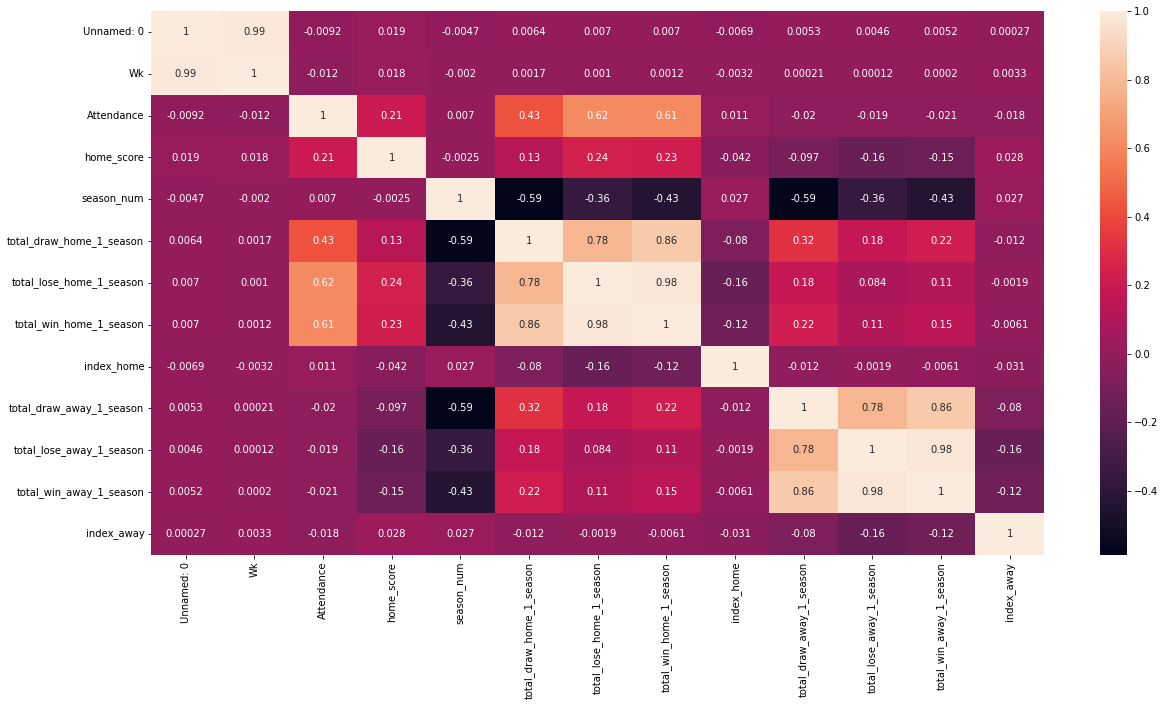

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

%matplotlib inline


plt.figure(figsize=(20,10)) 
sns.heatmap(df.corr(), annot= True)

In [44]:
df["home_score"] = pd.to_numeric(df["home_score"])

df[['Home','home_score','season_num']].groupby(['Home']).head().reset_index()
# .groupby('Home').head()
# .agg('sum').reset_index().head(50)
# [['Home','home_score','season_num']]

index             Home  home_score  season_num
0         0        Liverpool           2           1
1         1          Chelsea           1           1
2         2      Aston Villa           4           1
3         3  Oldham Athletic           0           1
4         4          Arsenal           0           1
..      ...              ...         ...         ...
245  154526        Brentford           2           1
246  154527        Brentford           2           2
247  154528        Brentford           2           3
248  154529        Brentford           2           4
249  154530        Brentford           2           5

[250 rows x 4 columns]

In [45]:
# Shuffle and split the dataset into training and testing set.
X_train, X_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size = 0.3,
                                                    random_state = 2,
                                                    stratify = y)

In [46]:
# Fitting Logistic Regression to the Training set
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [47]:
Y_pred = classifier.predict(X_test)

In [48]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, Y_pred)

<AxesSubplot:>

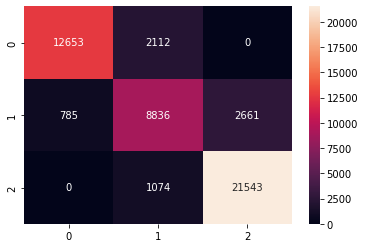

In [49]:
sns.heatmap(cm, annot=True,fmt='d')

In [50]:
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.94      0.86      0.90     14765
           1       0.73      0.72      0.73     12282
           2       0.89      0.95      0.92     22617

    accuracy                           0.87     49664
   macro avg       0.86      0.84      0.85     49664
weighted avg       0.87      0.87      0.87     49664



In [ ]:
#fitting the RANDOM FOREST to the training se
#classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier = RandomForestClassifier(criterion='gini', 
                             n_estimators=700,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)
classifier.fit(X_train, y_train)

In [ ]:
#predicting result
Y_pred = classifier.predict(X_test)

In [ ]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, Y_pred)

In [ ]:
sns.heatmap(cm, annot=True, fmt='d')

In [ ]:
print(classification_report(y_test, Y_pred))

In [ ]:
y_train = y_train.astype({'win_code':'int64'})

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.inspection import DecisionBoundaryDisplay

In [58]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [59]:
#predicting result
Y_pred = classifier.predict(X_test)

In [60]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, Y_pred)

<AxesSubplot:>

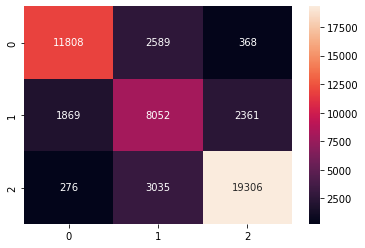

In [61]:
sns.heatmap(cm, annot=True, fmt='d')

In [62]:
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.85      0.80      0.82     14765
           1       0.59      0.66      0.62     12282
           2       0.88      0.85      0.86     22617

    accuracy                           0.79     49664
   macro avg       0.77      0.77      0.77     49664
weighted avg       0.80      0.79      0.79     49664



In [63]:

classifier = AdaBoostClassifier()
classifier.fit(X_train, y_train)

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier()

In [64]:
#predicting result
Y_pred = classifier.predict(X_test)

In [65]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, Y_pred)

<AxesSubplot:>

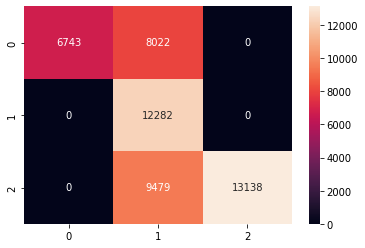

In [66]:
sns.heatmap(cm, annot=True, fmt='d')


In [67]:
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       1.00      0.46      0.63     14765
           1       0.41      1.00      0.58     12282
           2       1.00      0.58      0.73     22617

    accuracy                           0.65     49664
   macro avg       0.80      0.68      0.65     49664
weighted avg       0.85      0.65      0.67     49664



In [73]:
classifier = KNeighborsClassifier(3)
classifier.fit(X_train, y_train)

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [74]:
#predicting result
Y_pred = classifier.predict(X_test)

In [75]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, Y_pred)

<AxesSubplot:>

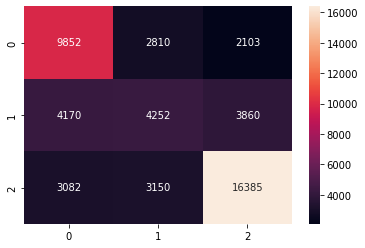

In [76]:
sns.heatmap(cm, annot=True, fmt='d')


In [77]:
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.58      0.67      0.62     14765
           1       0.42      0.35      0.38     12282
           2       0.73      0.72      0.73     22617

    accuracy                           0.61     49664
   macro avg       0.58      0.58      0.58     49664
weighted avg       0.61      0.61      0.61     49664



In [1]:
clasifier =MLPClassifier(alpha=1, max_iter=1000)
clasifier.fit(X_train, y_train)

NameError: name 'MLPClassifier' is not defined

In [ ]:
# # Predicting the Test set results
Y_pred = classifier.predict(X_test)

In [ ]:
# # Making the Confusion Matrix
cm = confusion_matrix(y_test, Y_pred)

In [ ]:
sns.heatmap(cm, annot=True,fmt='d')

In [ ]:
print(classification_report(y_test, Y_pred))